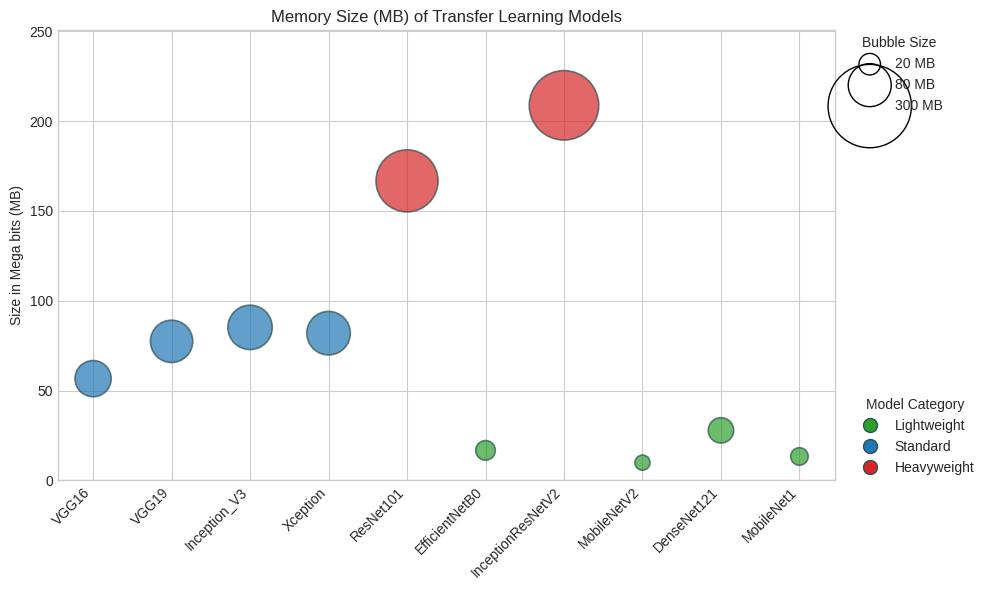

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Data
models = [
    "VGG16", "VGG19", "Inception_V3", "Xception",
    "ResNet101", "EfficientNetB0", "InceptionResNetV2",
    "MobileNetV2", "DenseNet121", "MobileNet1"
]

sizes_mb = np.array([56.64, 77.4, 85.18, 81.95,
                     166.74, 16.7, 208.78,
                     9.87, 27.85, 13.32])

x = np.arange(len(models))

# Model categories (example assignment)
categories = [
    "Standard", "Standard", "Standard", "Standard",
    "Heavyweight", "Lightweight", "Heavyweight",
    "Lightweight", "Lightweight", "Lightweight"
]

# Fixed colors per category (no colormap)
cat_to_color = {
    "Lightweight": "#2ca02c",   # green
    "Standard":    "#1f77b4",   # blue
    "Heavyweight": "#d62728"    # red
}
colors = [cat_to_color[c] for c in categories]

plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

scale_factor = 12
bubble_size = sizes_mb * scale_factor

# Bubble plot: size = MB, color = category (fixed, no colormap)
sc = ax.scatter(
    x, sizes_mb,
    s=bubble_size,
    c=colors,
    alpha=0.7,
    edgecolors="darkslategray",
    linewidths=1.2
)

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.set_ylabel("Size in Mega bits (MB)")
ax.set_title("Memory Size (MB) of Transfer Learning Models")

y_max = sizes_mb.max()
ax.set_ylim(0, y_max * 1.2)

# -------- Bubble-size legend (neutral color) --------
ref_sizes = [20, 80, 300]
size_handles = [
    ax.scatter([], [], s=s * scale_factor,
               facecolors="none",
               edgecolors="black",
               linewidths=1.0)
    for s in ref_sizes
]

size_legend = ax.legend(
    size_handles,
    [f"{s} MB" for s in ref_sizes],
    title="Bubble Size",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0.
)
size_legend.get_frame().set_alpha(0.9)

# -------- Color legend (model category) --------
cat_handles = [
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=cat_to_color["Lightweight"],
           markeredgecolor="darkslategray",
           markersize=10, label="Lightweight"),
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=cat_to_color["Standard"],
           markeredgecolor="darkslategray",
           markersize=10, label="Standard"),
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=cat_to_color["Heavyweight"],
           markeredgecolor="darkslategray",
           markersize=10, label="Heavyweight"),
]

cat_legend = ax.legend(
    handles=cat_handles,
    title="Model Category",
    loc="lower left",
    bbox_to_anchor=(1.02, 0),
    borderaxespad=0.
)
cat_legend.get_frame().set_alpha(0.9)

# Keep both legends
ax.add_artist(size_legend)

plt.tight_layout()
plt.show()